Correlation between 9X2 and TC_mean: -0.7996, p-value: 5.6584e-68


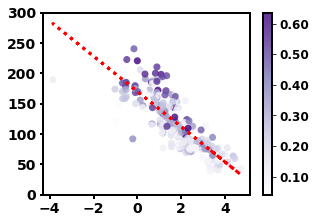

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from matplotlib.ticker import FormatStrFormatter 

file_path = './formula_data.csv'
all_data = pd.read_csv(file_path)

y = all_data['TC_mean']

X_columns = all_data.columns[all_data.columns == '9X2']

for col in X_columns:
    X = all_data[col]

    if X.isnull().any() or y.isnull().any():
        print(f"Warning: {col} contains NaN values. Skipping this column.")
        continue

    color_data = all_data['Water_bending_overlap_factor_to1']

    if color_data.isnull().any():
        print(f"Warning: c_interface_mean_to1 contains NaN values. Skipping this column.")
        continue
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    fit_line = slope * X + intercept

    plt.figure(figsize=(4.5, 3.2))
    scatter = plt.scatter(
        X, y,
        marker='o',
        c=color_data,
        cmap='Purples',
        alpha=0.8,
        edgecolor='none',
        s=50,
        vmin=np.percentile(color_data.dropna(), 2), 
        vmax=np.percentile(color_data.dropna(), 98)  
    )
    plt.plot(X, fit_line, color='red', lw=3, linestyle='dotted')  

    plt.ylim(0.0, 300.0)

    cbar = plt.colorbar(scatter)

    for spine in cbar.ax.spines.values():
        spine.set_linewidth(2)  

    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    cbar.ax.yaxis.label.set_size(14)
    cbar.ax.yaxis.label.set_weight('bold') 

    cbar.ax.tick_params(labelsize=12)
    for label in cbar.ax.get_yticklabels():
        label.set_fontsize(12) 
        label.set_weight('bold') 

    plt.tick_params(axis='both', which='major', width=2)
    plt.tick_params(axis='both', which='minor', width=1) 
    plt.tick_params(axis='both', labelsize=10)

    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)

    plt.yticks([0, 50, 100, 150, 200, 250, 300], fontsize=14, fontweight='bold')  
    plt.xticks(fontsize=14, fontweight='bold') 

    correlation_coefficient, p_value = stats.pearsonr(X, y)
    print(f'Correlation between {col} and TC_mean: {correlation_coefficient:.4f}, p-value: {p_value:.4e}')

    name = col + '.jpg'
    plt.tight_layout()
    plt.savefig(name, dpi=800)
    plt.show()